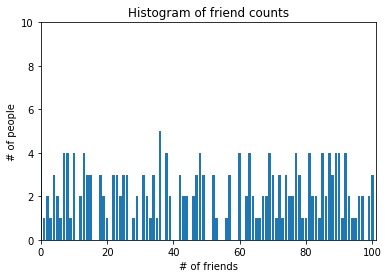

In [1]:
#statistics from scratch
from collections import Counter
import matplotlib.pyplot as plt
import random
#num_friends = [100,49,41,40,25]
num_friends = [random.randint(0,100) for i in range(204)] #making a random list
friend_counts = Counter(num_friends)

xs = range(101) #largest value is 100
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0,101,0,10])
plt.title("Histogram of friend counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [2]:
#describing data
num_point =len(num_friends)
print("num of data points:", num_point)

num of data points: 204


In [3]:
#largest and smaller values
largest_value = max(num_friends)
smaller_value = min(num_friends)
print("largest and smaller values are", largest_value,"and", smaller_value)

largest and smaller values are 100 and 0


In [4]:
#central tendencies
#mean / average
from typing import List
def mean(xs: List[float]) -> float:
  return sum(xs)/len(xs)
print("mean of # of friends: ",mean(num_friends))

#median

def median(v: List[float]) -> float:
  sorted_v = sorted(v)
  midpoint = len(v) // 2
  if len(v)%2 == 0:  #average of two central elements
    return (sorted_v[midpoint-1]+sorted_v[midpoint])/2
  else:
    return sorted_v[midpoint]

print("median of [1,3,2]", median([1,3,2]))
print("median of [1,2,3,4]", median([1,2,3,4]))
print("median of # of friends", median(num_friends))

#quantile
def quantile(xs: List[float], p: float) -> float:
  #return the pth-percentile value
  p_index = int(p*len(xs))
  return sorted(xs)[p_index]

print("first decile: ",quantile(num_friends, 0.1))
print("first quantile: ",quantile(num_friends, 0.25))
print("second quantile: ",quantile(num_friends, 0.50))
print("third quantile:", quantile(num_friends, 0.75))

#mode
def mode(x:List[float]) -> List[float]:
  #return a list, since there might be more than one mode
  counts = Counter(x)
  max_count = max(counts.values())
  return [x_i for x_i, count in counts.items() if count == max_count]

print("mode of num of friends: ", mode(num_friends))
print("mode of num of [1,2,3,4,3,2,2]: ", mode([1,2,3,4,3,2,2]))

mean of # of friends:  50.97549019607843
median of [1,3,2] 2
median of [1,2,3,4] 2.5
median of # of friends 50.5
first decile:  8
first quantile:  24
second quantile:  52
third quantile: 78
mode of num of friends:  [36]
mode of num of [1,2,3,4,3,2,2]:  [2]


In [5]:
#dispersion: how spread is our data

#measuring "range" i.e. difference between alrgest and smallest element
def data_range(xs:  List[float]) -> float:
  return max(xs) - min(xs)

print("range between num_friends:", data_range(num_friends)) #100 cause is 100 - 0. if all elements are equal then range is 0

#range may not be usefull if there are outliers (for example 1 zero and all other are 100)
#so we will compute variance
import math 
def de_mean(xs: List[float], pow: int) -> List[float]:
  #translate xs by substracting it mean (so the result has mean 0)
  x_bar = mean(xs)
  return [math.pow((x - x_bar),2) for x in xs]

def variance(xs: List[float]) -> float:
  #almost the average squared deviation from the mean
  assert len(xs)  > 2, "variance requires at leats 2 elements"
  n = len(xs)
  deviation = de_mean(xs, pow)
  return sum(deviation)/(n - 1)

print("variance of num_friends:", variance(num_friends))
print("sqrt of num_friends:", math.sqrt(variance(num_friends)))

#The problem with outliers is still here, so a more robust alternative is to compute the difference between the 75 and 25 percentile values

def interquartile_range(xs: List[float]) -> float:
  #returns the difference between the 75%-ile and 25%-ile
  return quantile(xs,0.75) -quantile(xs,0.25)

print("interquantile difference (75% - 25% ile) of num friends is:", interquartile_range(num_friends))

range between num_friends: 100
variance of num_friends: 927.3540761132044
sqrt of num_friends: 30.452488832822915
interquantile difference (75% - 25% ile) of num friends is: 54


In [6]:
#Covariance indicates the level to which two variables vary together.
def covariate(xs: List[float], ys: List[float]) -> float:
  mean_xs = mean(xs)
  mean_ys = mean(ys)
  assert len(xs) == len(ys), "covariance need the same number of elements in both lists"
 # for x_i, y_i in zip(xs,ys):
  covariance = ([(x_i-mean_xs)*(y_i-mean_ys) for x_i, y_i in zip(xs,ys)])
  covariance = sum(covariance)/(len(xs)-1)
  return covariance

print("covariate of [0,4,8] & [5,5,8] is ",covariate([0,4,8],[5,5,8])) #a positive values is a positive relationship
#a larger positive covariance means that x tends to be large when y is large
#a larger negative covariance means the opposite, that x tends to be small when 
#y is larve and viceversa

#this number is hard to interpret, cause units are the product of the input units
#(example friends-minutes-per-day)
#if we compare friends and time spending in a platform like facebook, if each
#user had twice as many friends(but the same number of minutes) the covariance
#would be twice as large. but in a sense, the variables would be just as iterrelated 
#(in other words its hard to say what counts as a large covariance)

#for these reasons we look for correlation, diciding the standar deviation of both variables
def correlation(xs: List[float], ys: List[float]) -> float:
  #measures how much xs and ys vary in tandem about their means in range between -1 and 1
  stdev_x = math.sqrt(variance(xs))
  stdev_y = math.sqrt(variance(ys))
  if stdev_x >0 and stdev_y >0:
    return covariate(xs,ys)/(stdev_x *stdev_y)
  else:
    return 0 # if no variation, correlation is 0

print("correlation of [0,4,8] & [-5,-20,-32] is",correlation([0,4,8],[-5,-20,-32])) 
  
#correlation can be very sensitive to outliers, so deleting them we could get much more strong correlations (if we can)

covariate of [0,4,8] & [5,5,8] is  6.0
correlation of [0,4,8] & [-5,-20,-32] is -0.9979487157886733
